In [252]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from osgeo import gdal
from scipy.interpolate import interp1d
from scipy import signal
from scipy.interpolate import interp2d, NearestNDInterpolator
import seaborn as sns
import seaborn.objects as so
import csv

%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Arial' # Choose a nice font here
plt.rcParams['font.size'] = 7 # standard font size
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial'
plt.rcParams['figure.facecolor'] = 'white' # make sure background isn't transparent
plt.rcParams['figure.dpi'] = 100

os.chdir('C:/Users/ptrck/EAE_Intensive')
print(os.getcwd())


C:\Users\ptrck\EAE_Intensive


In [216]:
d = []
with open('wood23.txt') as source:
    for line in source:
        fields = line.split('\t')
        d.append(fields)
d = np.array(d)   
#-------------------------------------------------------------------------------------
d2 = []
with open('wood23_2.txt') as source:
    for line in source:
        fields = line.split('\t')
        d2.append(fields)
d2 = np.array(d2)   

In [217]:
new_d = np.delete(d, np.s_[4],axis=1)

new_d2 = np.delete(d2, np.s_[4],axis=1)

In [218]:
df = pd.DataFrame(new_d, columns=new_d[0,:])
df = df.drop(0)
df2 = pd.DataFrame(new_d2, columns=new_d2[0,:])
df2 = df2.drop(0)

In [219]:
df = df.astype(float)
df2 = df2.astype(float)

## Analysis

## Isotopic ratios

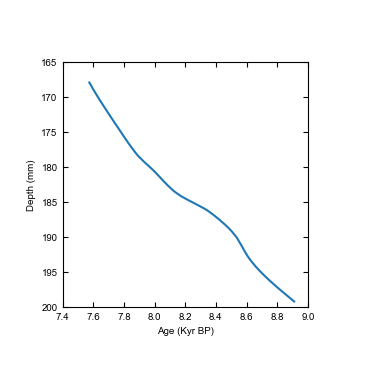

In [289]:
draft = False
pltspan = 0.7
ax0l,ax0b,ax0w,ax0h = 0.15,0.15,pltspan,pltspan


fig = plt.gcf()
ax00 = fig.add_axes([0,0,1,1])
if draft:
    plt.xticks([])
    plt.yticks([])
else:
    plt.axis('off')


ax = fig.add_axes([ax0l,ax0b,ax0w,ax0h])
ax.set_xlim(7.4,9)
ax.set_ylim(200,165)
ax.plot(df['age']/1000,df['depth'],rasterized=True)
ax.set_xlabel("Age (Kyr BP)")
ax.set_ylabel("Depth (mm)")
ax.tick_params('x', top=True,bottom=True,direction='in')
ax.tick_params('y', right=True,left=True,direction='in')
fig.set_size_inches(89/25.4,89/25.4)

if draft==False:
    plt.savefig('Age_Depth_Plot.pdf',dpi=300)
    plt.savefig('Age_Depth_Plot.png',dpi=300)

In [353]:
mean = df.groupby(pd.cut(df['age'], (8300,8600))).mean()
var =  df.groupby(pd.cut(df['age'], (8300,8600))).var()
std = df.groupby(pd.cut(df['age'], (8300,8600))).std()
min_ = df.groupby(pd.cut(df['age'], (8300,8600))).min()
max_ = df.groupby(pd.cut(df['age'], (8300,8600))).max()
min_ = min_.iloc[0]['d18O']
max_ = max_.iloc[0]['d18O']
d18O_2sig = 2*std.iloc[0]['d18O']
d18Omean = mean.iloc[0]['d18O']
d18O_significant = d18Omean + d18O_2sig
d18O_5sig = d18Omean + 5*std.iloc[0]['d18O']

In [357]:
print(d18Omean)
print(d18O_2sig)
print(d18O_significant)
min_
max_

-9.902992125984252
0.2983586311235283
-9.604633494860723


-9.58

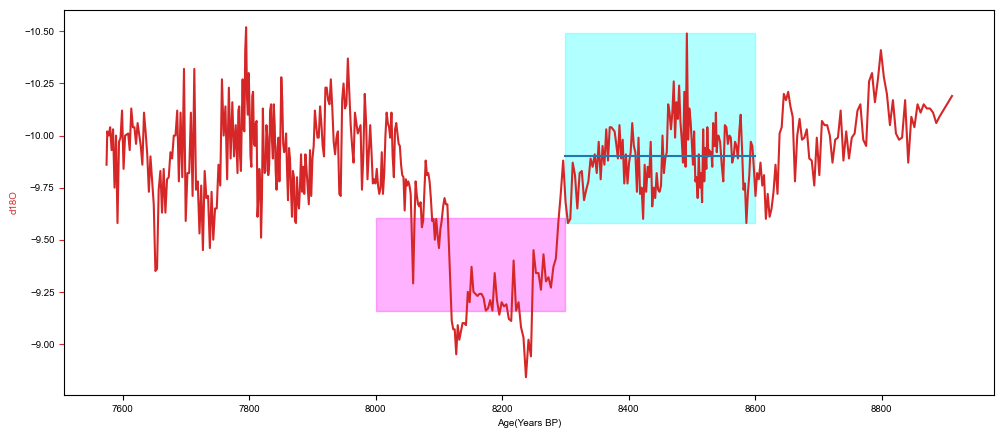

In [362]:
fig, ax1 = plt.subplots(figsize=(12,5))
color = 'tab:red'
ax1.set_xlabel('Age(Years BP)')
ax1.set_ylabel('d18O',color=color)
ax1.plot(df['age'],df['d18O'], color=color)
ax1.tick_params(axis='y',color=color)
ax1.invert_yaxis()
#ax1.axvspan(8300, 8600, alpha=0.3, color='cyan')
ax1.fill_between((8300,8600),(max_,max_),(min_,min_),color="cyan",alpha=0.3)
ax1.fill_between((8000,8300),(d18O_5sig,d18O_5sig),(d18O_significant,d18O_significant),color="magenta",alpha=0.3)
ax1.plot((8300,8600),(d18Omean,d18Omean))
#ax1.plot((8000,8300),(d18O_significant,d18O_significant))
#ax1.plot((8000,8300),(d18O_5sig,d18O_5sig))
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#color='tab:blue'
#ax2.set_ylabel('d13C', color=color)  # we already handled the x-label with ax1
#ax2.plot(df['age'],df['d13C'], color=color)
#ax2.tick_params(axis='y', labelcolor=color)



plt.show()

In [335]:
df['age_50'] = df['age'].rolling(window=10).mean()
df['d18O_50'] = df['d18O'].rolling(window=10).mean()
df['d13C_50'] = df['d13C'].rolling(window=10).mean()
df['d18O_var'] = df['d18O'].rolling(window=10).std()
df['d13C_var'] = df['d13C'].rolling(window=10).std()

In [336]:
temp_neg = np.array(df['d18O_50']-df['d18O_var'])
temp_pos = np.array(df['d18O_50']+df['d18O_var'])

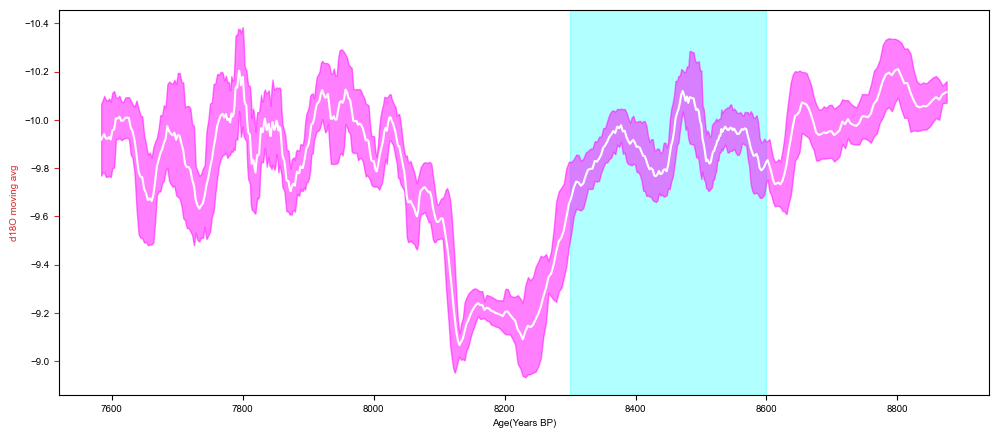

In [339]:
fig, ax1 = plt.subplots(figsize=(12,5))
color = 'tab:red'
ax1.set_xlabel('Age(Years BP)')
ax1.set_ylabel('d18O moving avg',color=color)

ax1.tick_params(axis='y',color=color)
ax1.invert_yaxis()
ax1.axvspan(8300, 8600, alpha=0.3, color='cyan')

ax1.fill_between(df['age_50'],temp_pos,temp_neg,color="magenta",alpha=0.5)
ax1.plot(df['age_50'],df['d18O_50'], color="white")

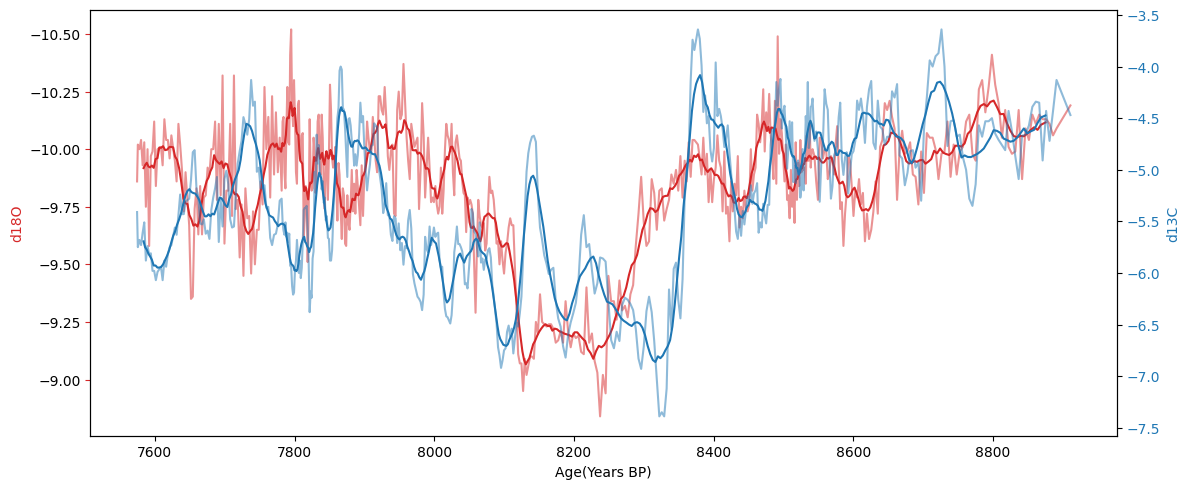

In [223]:
fig, ax1 = plt.subplots(figsize=(12,5))
color = 'tab:red'
ax1.set_xlabel('Age(Years BP)')
ax1.set_ylabel('d18O',color=color)
ax1.plot(df['age'],df['d18O'], color=color,alpha=0.5)
ax1.plot(df['age_50'],df['d18O_50'], color=color)
ax1.tick_params(axis='y',color=color)
ax1.invert_yaxis()


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color='tab:blue'
ax2.set_ylabel('d13C', color=color)  # we already handled the x-label with ax1
ax2.plot(df['age_50'],df['d13C_50'], color=color)
ax2.plot(df['age'],df['d13C'], color=color,alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout() 
plt.show()

In [224]:
a1 = df['age']
a1 = np.array(a1)
a2 = np.empty(len(a1))*np.nan
for i in range(len(a1)):
    if i>0:
        a2[i] = a1[i]-a1[i-1]
a3 = np.delete(a2,0,0)
a3mean = np.mean(a3)
a3var = np.var(a3)
a3std = np.std(a3)
print("mean",a3mean,"var",a3var,"std",a3std)

mean 2.6099609374999986 var 1.4739046859741105 std 1.2140447627555215


In [225]:
#age step interpolation

#set variables
d18O = df['d18O']
time = df['age']
#data needs to have even steps

#interpolate to give values to new steps
interp_func = interp1d(time, d18O)

new_d18O = interp_func(np.arange(time.min(),time.max(), 1))
new_time = np.arange(time.min(),time.max(), 1)

In [226]:
f, PUU = signal.welch(new_d18O,1/np.diff(new_time)[0],scaling='spectrum',nperseg=len(new_time))
f_smooth, PUU_smooth = signal.welch(new_d18O,1/np.diff(new_time)[0], scaling='spectrum',nperseg=200)


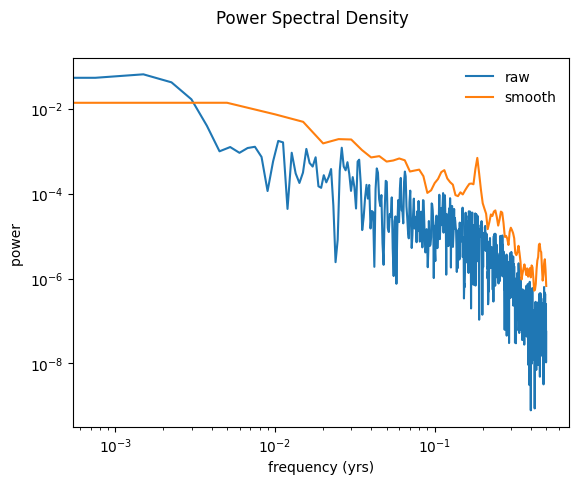

In [227]:
plt.plot(f, PUU,label='raw')
plt.suptitle("Power Spectral Density")
plt.plot(f_smooth, PUU_smooth,label='smooth')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('frequency (yrs)')
plt.ylabel('power ')
plt.legend(frameon=False)

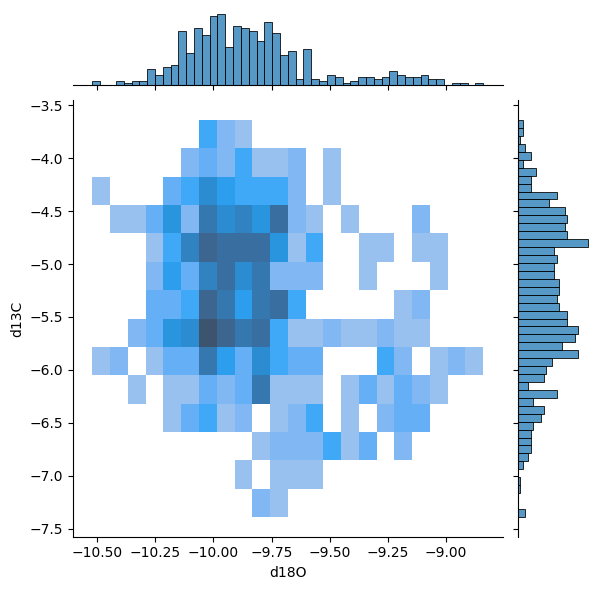

In [228]:
g = sns.JointGrid(df, x="d18O", y="d13C")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.histplot,bins=50)

## Trace elements

In [229]:
df2['age_mov'] = df2['age'].rolling(window=100).mean()
df2['Mg/Ca_mov'] = df2['Mg/Ca'].rolling(window=100).mean()
df2['Sr/Ca_mov'] = df2['Sr/Ca'].rolling(window=100).mean()

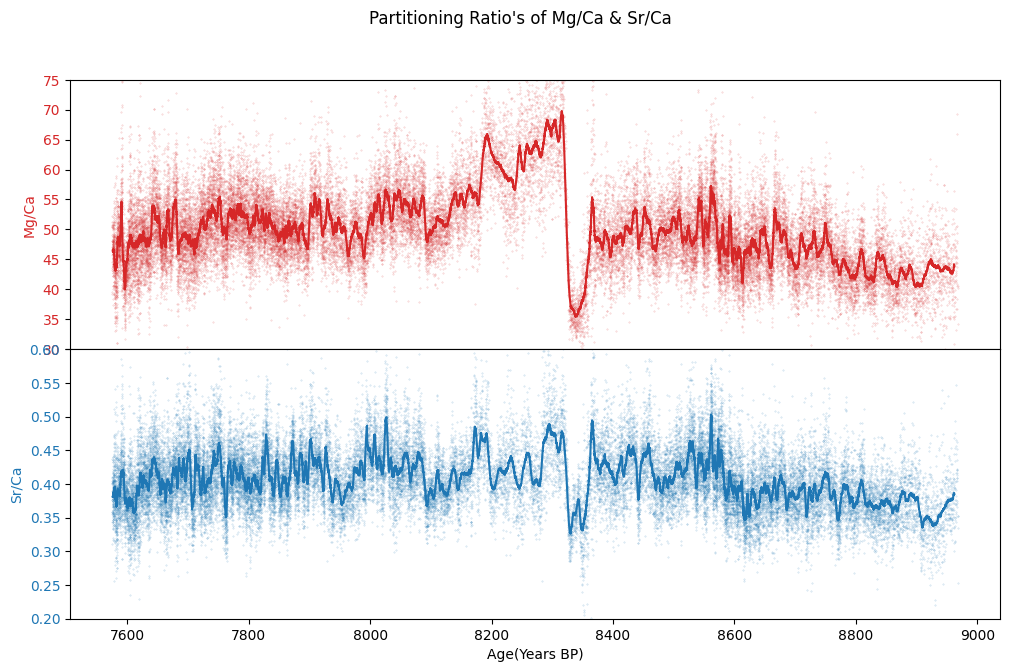

In [230]:
fig, axs = plt.subplots(2,figsize=(12,7))
plt.subplots_adjust(hspace=0)
plt.rcParams['axes.grid'] = False
fig.suptitle("Partitioning Ratio's of Mg/Ca & Sr/Ca")

color = 'tab:red'

axs[0].set_ylabel('Mg/Ca',color=color)
axs[0].scatter(df2['age'],df2['Mg/Ca'], color=color,alpha=0.3,s=0.1)
axs[0].plot(df2['age_mov'],df2['Mg/Ca_mov'], color=color)
axs[0].tick_params(axis='y',labelcolor=color)
axs[0].tick_params(axis='x',bottom=False,labelbottom=False)
axs[0].set_ylim(30,75)


color='tab:blue'
axs[1].set_xlabel('Age(Years BP)')
axs[1].set_ylabel('Sr/Ca', color=color)  # we already handled the x-label with ax1
axs[1].scatter(df2['age'],df2['Sr/Ca'], color=color,alpha=0.3,s=0.1)
axs[1].plot(df2['age_mov'],df2['Sr/Ca_mov'], color=color)
axs[1].tick_params(axis='y', labelcolor=color)
axs[1].set_ylim(0.2,0.6)



plt.show()

<Axes: xlabel='Mg/Ca', ylabel='Sr/Ca'>

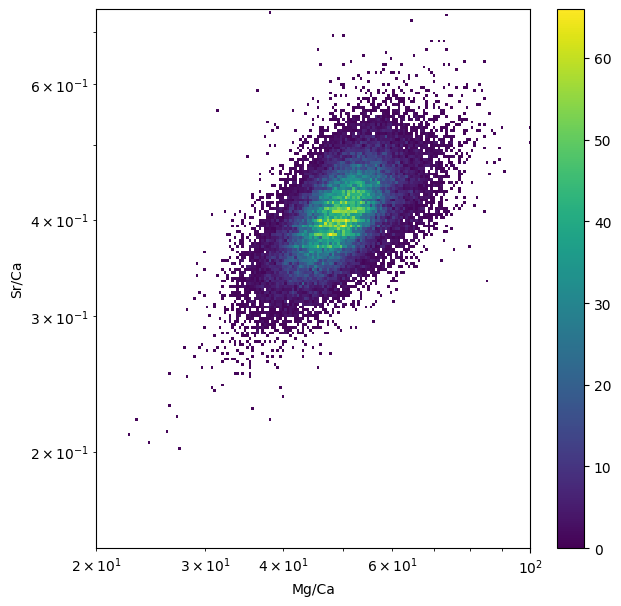

In [231]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
plt.ylim(0.15,0.75)
plt.xlim(20,100)
sns.histplot(df2, x="Mg/Ca", y="Sr/Ca",ax=ax,cmap="viridis", cbar=True)

# Plots

## Combined


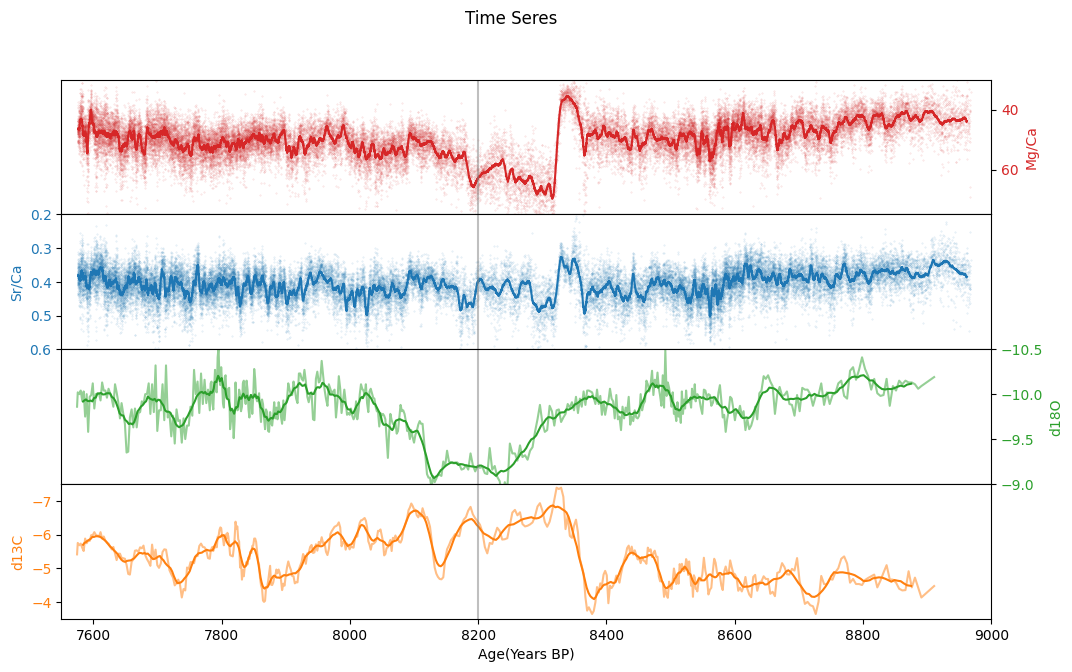

In [250]:
fig, axs = plt.subplots(4,figsize=(12,7))
plt.subplots_adjust(hspace=0)
plt.rcParams['axes.grid'] = False
fig.suptitle("Time Seres")
axs[0].yaxis.set_label_position("right")
axs[2].yaxis.set_label_position("right")

axs[0].set_xlim(7550,9000)
axs[1].set_xlim(7550,9000)
axs[2].set_xlim(7550,9000)
axs[3].set_xlim(7550,9000)

axs[3].set_ylim(-3.5,-7.5)
axs[2].set_ylim(-9,-10.5)
#-------------------------------------------------------------------------------------------
#Partitioning Ratio's

#Mg/Ca
color = 'tab:red'
axs[0].set_ylabel('Mg/Ca',color=color)
axs[0].scatter(df2['age'],df2['Mg/Ca'], color=color,alpha=0.2,s=0.1)
axs[0].plot(df2['age_mov'],df2['Mg/Ca_mov'], color=color)
axs[0].tick_params(axis='y',labelcolor=color,labelleft=False,left=False,labelright=True,right=True)
axs[0].tick_params(axis='x',bottom=False,labelbottom=False)
axs[0].set_ylim(75,30)

#Sr/Ca
color='tab:blue'
axs[1].set_ylabel('Sr/Ca', color=color)  # we already handled the x-label with ax1
axs[1].scatter(df2['age'],df2['Sr/Ca'], color=color,alpha=0.2,s=0.1)
axs[1].plot(df2['age_mov'],df2['Sr/Ca_mov'], color=color)
axs[1].tick_params(axis='y', labelcolor=color)
axs[1].set_ylim(0.6,0.2)
axs[1].tick_params(axis='y',labelcolor=color)
axs[1].tick_params(axis='x',bottom=False,labelbottom=False)


#-------------------------------------------------------------------------------------------
#Isotopic Ratios


#d18O
color = 'tab:green'
axs[2].set_ylabel('d18O',color=color)
axs[2].plot(df['age'],df['d18O'], color=color,alpha=0.5)
axs[2].plot(df['age_50'],df['d18O_50'], color=color)
axs[2].tick_params(axis='y',labelcolor=color,labelleft=False,left=False,labelright=True,right=True)
axs[2].tick_params(axis='x',bottom=False,labelbottom=False)
#d13C
color='tab:orange'
axs[3].set_ylabel('d13C', color=color)  # we already handled the x-label with ax1
axs[3].plot(df['age_50'],df['d13C_50'], color=color)
axs[3].plot(df['age'],df['d13C'], color=color,alpha=0.5)
axs[3].set_xlabel('Age(Years BP)')
axs[3].tick_params(axis='y',labelcolor=color)

#-------------------------------------------------------------------------------------------
#order=[7600,7700,7800,7900,8000,8100,8200,8300,8400,8500,8600,8700,8800,8900]
#for i in range(4):
   # for j in order:
     #   axs[i].vlines(j,-100,100,color="grey",alpha=0.5)

for i in range(4):
    axs[i].vlines(8200,-100,100,color="grey",alpha=0.5)


#-------------------------------------------------------------------------------------------

fig.subplots_adjust(hspace=0)
#note  -    fig.tight_layout doesnt work with hspace=0
plt.show()

In [233]:
order=[7600,7700,7800,7900,8000,8100,8200,8300,8400,8500,8600,8700,8800,8900]
order

[7600,
 7700,
 7800,
 7900,
 8000,
 8100,
 8200,
 8300,
 8400,
 8500,
 8600,
 8700,
 8800,
 8900]